# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
netflix_data = pd.read_csv("Netflix_Userbase.csv")

In [ ]:
selected_features = ['Age', 'Gender']

In [ ]:
X = netflix_data[selected_features]
y = netflix_data['Monthly Revenue']


In [ ]:
print(netflix_data.head())
print(netflix_data.info())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             -----

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
print(netflix_data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


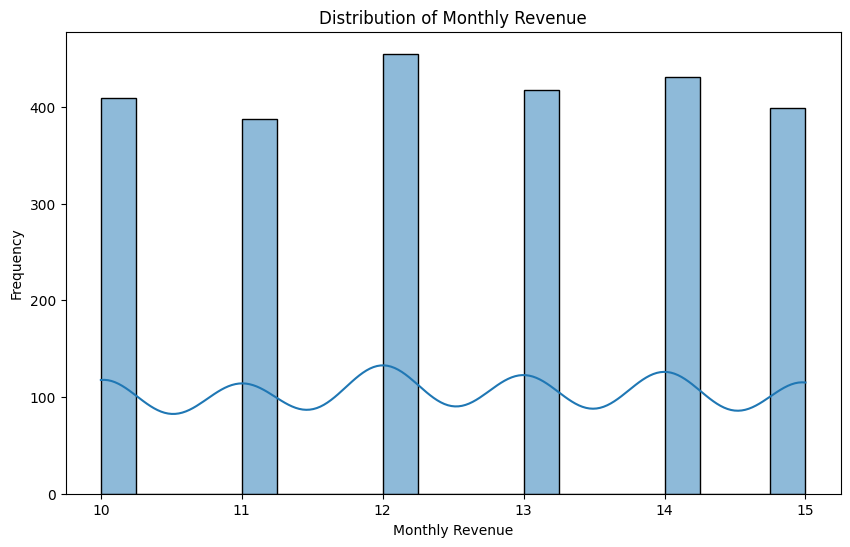

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

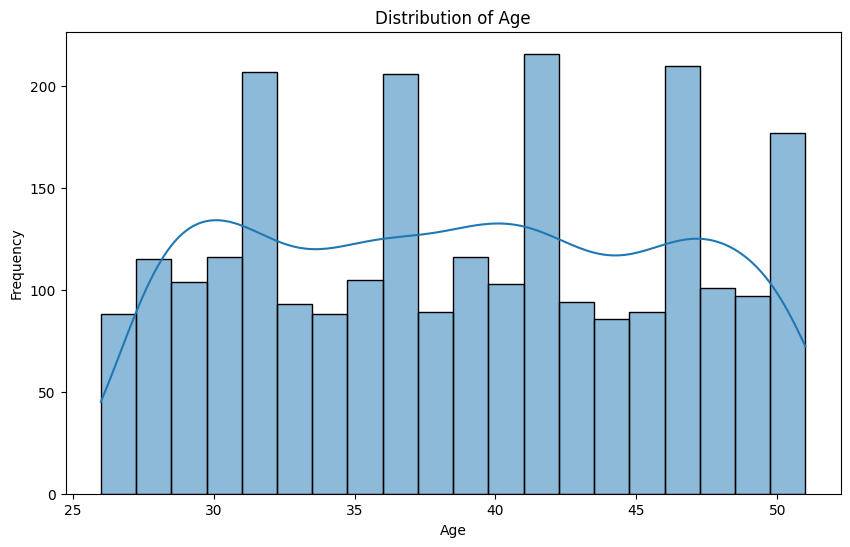

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_encoded, y_train_encoded)

LinearRegression()

In [ ]:
y_pred_encoded = linear_reg_model.predict(X_test_encoded)

In [ ]:
r2_encoded = r2_score(y_test_encoded, y_pred_encoded)
rmse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded, squared=False)
print("R-squared (encoded):", r2_encoded)
print("Root Mean Squared Error (encoded):", rmse_encoded)

R-squared (encoded): -0.006825315867474924
Root Mean Squared Error (encoded): 1.6676356278201905


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_encoded, y_train_encoded)


LogisticRegression()

In [ ]:
y_pred_encoded = logistic_reg_model.predict(X_test_encoded)

In [ ]:
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
precision_encoded = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall_encoded = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1_encoded = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)

print("Accuracy (encoded):", accuracy_encoded)
print("Precision (encoded):", precision_encoded)
print("Recall (encoded):", recall_encoded)
print("F1 Score (encoded):", f1_encoded)
print("Confusion Matrix (encoded):\n", conf_matrix_encoded)


Accuracy (encoded): 0.176
Precision (encoded): 0.1104242775124234
Recall (encoded): 0.176
F1 Score (encoded): 0.11983758593134602
Confusion Matrix (encoded):
 [[12  0 55 17  1  0]
 [16  0 42 19  2  0]
 [19  0 54 17  3  0]
 [21  0 40 20  7  0]
 [18  0 56  9  2  0]
 [16  0 35 16  3  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Part 5: Comparative Analysis and Visualization**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_encoded, y)

LinearRegression()

In [ ]:
lr_coef = lr_model.coef_
feature_importance_lr = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': lr_coef})
print("Linear Regression Feature Importance:")
print(feature_importance_lr)


Linear Regression Feature Importance:
       Feature  Coefficient
0          Age    -0.005038
1  Gender_Male    -0.023568


In [ ]:
numerical_features = ['Age']
categorical_features = ['Gender']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
log_reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('logistic_regression', LogisticRegression())
])

In [ ]:
log_reg_model = log_reg_pipeline.named_steps['logistic_regression']

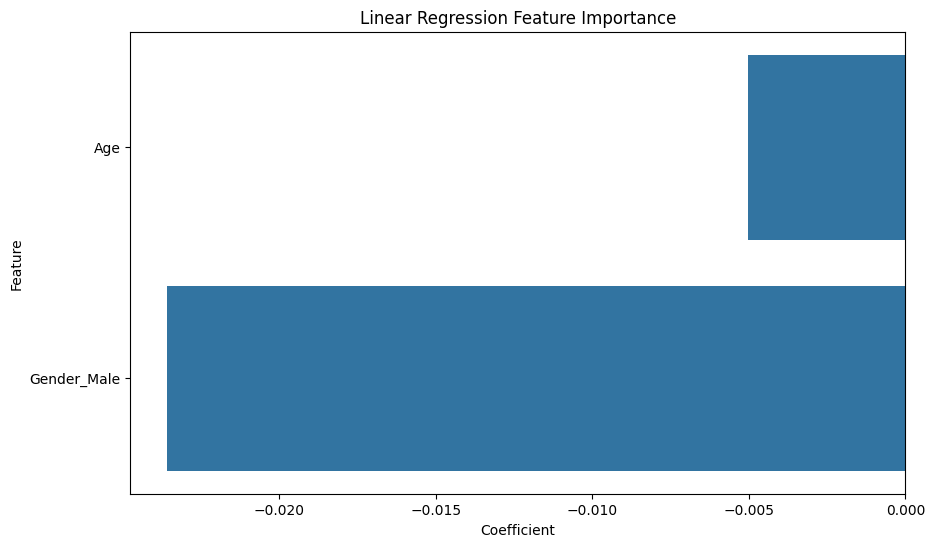

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Linear Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()